<a href="https://colab.research.google.com/github/Inferno-coder/MachineLearning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression Practicing using the titanic dataset

importing the necessory libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [94]:
originalData=pd.read_csv('Titan_data.csv')
df=originalData
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Analyzing the Data:

<Axes: xlabel='Survived', ylabel='count'>

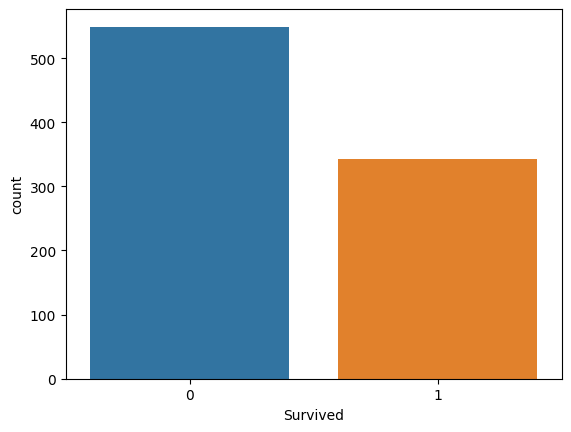

In [12]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

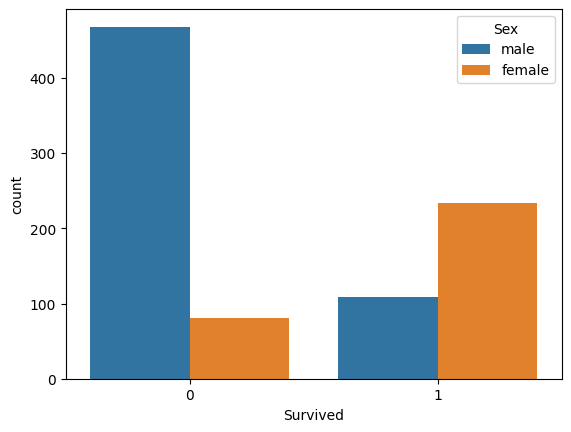

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: >

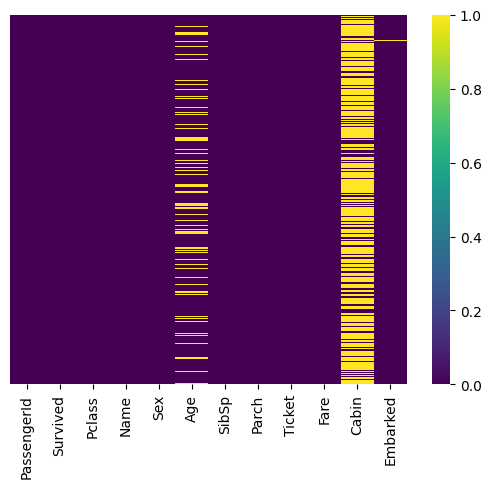

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [27]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
df.dropna(inplace=True)

<Axes: >

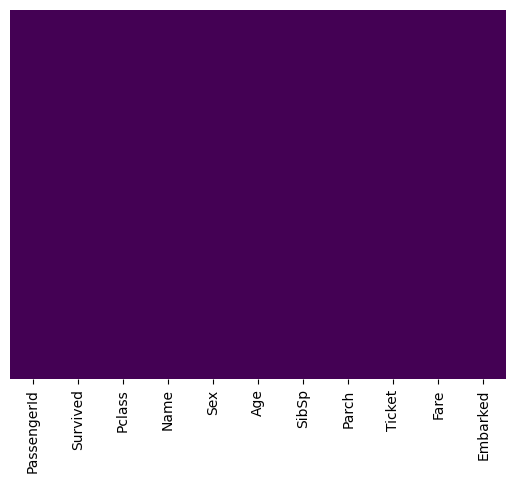

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [95]:
sex=pd.get_dummies(df.Sex,drop_first=True)
pclass=pd.get_dummies(df.Pclass,drop_first=True)
emb=pd.get_dummies(df.Embarked,drop_first=True)

In [67]:
df=pd.concat([df,sex,pclass,emb],axis=1)
df.head()

,Survived,Age,SibSp,Parch,male,2,3,Q,S,male,2,3,Q,S
0,0,22.0,1,0,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,35.0,0,0,1,0,1,0,1,1,0,1,0,1


#Training the Model

In [90]:
from sklearn.model_selection import train_test_split
model=LogisticRegression()
X=df.drop("Survived",axis=1)
y=df.Survived
X.columns=X.columns.astype(str)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3 ,random_state=1)
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [91]:
pred=model.predict(Xtest)

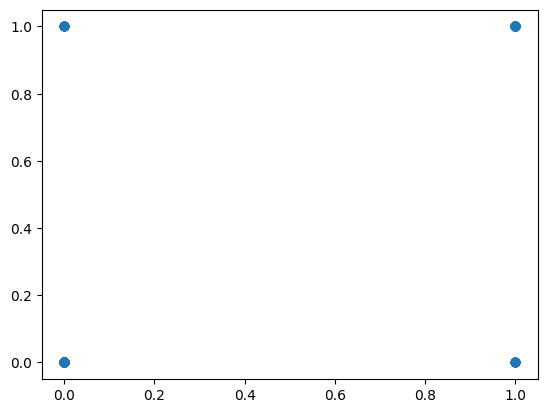

In [92]:
plt.scatter(pred,Ytest)

In [85]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as score
cr(pred,Ytest)


'              precision    recall  f1-score   support\n\n           0       0.84      0.79      0.81       133\n           1       0.69      0.75      0.72        81\n\n    accuracy                           0.78       214\n   macro avg       0.76      0.77      0.77       214\nweighted avg       0.78      0.78      0.78       214\n'

In [84]:
cm(Ytest,pred)

array([[105,  20],
       [ 28,  61]])

In [86]:
score(pred,Ytest)

0.7757009345794392